In [5]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
print(foods_binary.shape)

(100, 10)


In [2]:
dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
print(dis_matrix.shape)

(100, 100)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[[0.         0.88888889 0.88888889 ... 0.71428571 0.625      0.85714286]
 [0.88888889 0.         0.4        ... 0.83333333 0.875      1.        ]
 [0.88888889 0.4        0.         ... 0.83333333 0.875      0.8       ]
 ...
 [0.71428571 0.83333333 0.83333333 ... 0.         0.66666667 1.        ]
 [0.625      0.875      0.875      ... 0.66666667 0.         0.83333333]
 [0.85714286 1.         0.8        ... 1.         0.83333333 0.        ]]


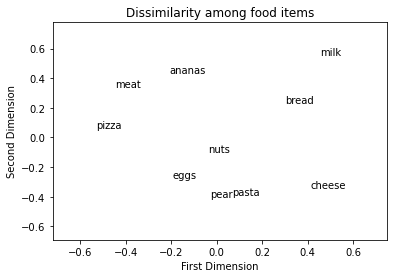

In [7]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 
print(dis_matrix)
food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'ananas', 'pear', 'bread', 'nuts', 'milk']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()